In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_data =pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(train_data.shape)

(614, 13)


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
def missing_values(df):
  a = num_null_values = df.isnull().sum()
  return a

missing_values(train_data)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train_data.drop(["Loan_ID","Dependents"], axis = 1, inplace = True)

In [10]:
cols = train_data[["Gender","Married","Self_Employed"]]
for i in cols:
  train_data[i].fillna(train_data[i].mode().iloc[0],inplace=True)

In [11]:
train_data.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
n_cols = train_data[["LoanAmount","Loan_Amount_Term","Credit_History"]]
for i in n_cols:
  train_data[i].fillna(train_data[i].mean(axis = 0), inplace=True)

In [13]:
def bar_chart(col):
  Approved = train_data[train_data["Loan_Status"] == "Y"][col].value_counts()
  Disapproved = train_data[train_data["Loan_Status"] == "N"][col].value_counts()

  df1 = pd.DataFrame([Approved, Disapproved])
  df1.index = ["Approved", "Disapproved"]
  df1.plot(kind = "bar")

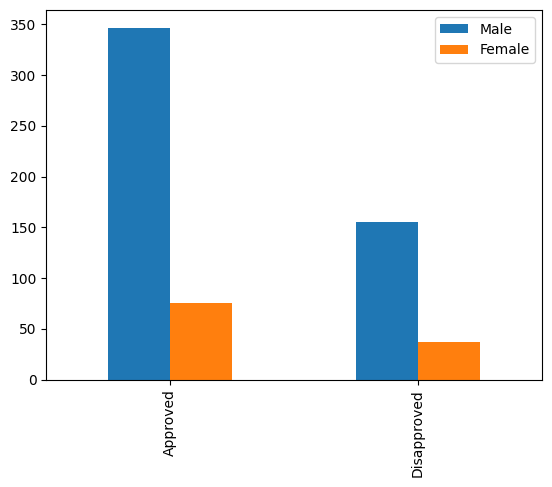

In [14]:
bar_chart("Gender")

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(train_data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']])
train_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [16]:
from sklearn.model_selection import train_test_split
X =train_data.drop("Loan_Status", axis = 1)
y = train_data["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 10)
(429,)
(185, 10)
(185,)


In [17]:
from sklearn.naive_bayes import GaussianNB

gfc = GaussianNB()
gfc.fit(X_train, y_train)
pred1 = gfc.predict(X_test)


In [19]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
def loss(y_true, y_pred):
  pre = precision_score(y_true, y_pred)
  rec = recall_score(y_true, y_pred)
  acc = accuracy_score(y_true, y_pred)

  print(pre)
  print(rec)
  print(acc)

In [20]:
loss(y_test, pred1)

0.7834394904458599
0.968503937007874
0.7945945945945946


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001],
          'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.686 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [25]:
svc = SVC(C= 0.1, gamma= 1, kernel= 'rbf')
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)
loss(y_test, pred2)

0.6864864864864865
1.0
0.6864864864864865


In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.1,
                    n_estimators = 1000,
                    max_depth = 3,
                    min_child_weight = 1,
                    gamma = 0,
                    subsample = 0.8,
                    colsample_bytree = 0.8,
                    objective = 'binary:logistic',
                    nthread = 4,
                    scale_pos_weight = 1,
                    seed = 27)

xgb.fit(X_train, y_train)
pred3 = xgb.predict(X_test)
loss(y_test, pred3)

0.8057553956834532
0.8818897637795275
0.772972972972973


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_

    best_score = rand_clf.best_score_
    print("Training score: {:.3f}".format(best_score))

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))

    return best_model

In [37]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.813
Test score: 0.800


DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')

In [38]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')

ds.fit(X_train, y_train)
pred4 = ds.predict(X_test)
loss(y_test, pred4)

0.78125
0.984251968503937
0.8


In [39]:
import joblib
joblib.dump(ds, "model.pkl")
model = joblib.load('model.pkl')